In [14]:
import cv2
import os
import matplotlib.pyplot as plt

In [15]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

In [16]:
def showim(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [17]:
imgs = load_images_from_folder("receipt")

In [18]:
len(imgs)

200

In [19]:
img = imgs[1]

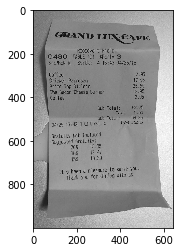

In [20]:
showim(img)

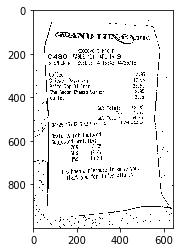

In [21]:
thImg = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,15)
showim(thImg)

In [22]:
for i in range(len(imgs)):
    cv2.imwrite('receipt\processed\{}.jpg'.format(i),cv2.adaptiveThreshold(imgs[i],255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,15))

In [23]:
import pytesseract as pyt

In [24]:
# print(pyt.image_to_string(thImg))
def detect_text(path):
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

In [25]:
from google.cloud import vision
import io

In [117]:
from google.cloud import vision 
from matplotlib import pyplot as plt 
from matplotlib import patches as pch 
  
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.join(os.curdir, 'CalhackCV-a4f9f43dfda3.json') 
  
# client = vision.ImageAnnotatorClient() 
  

      
# image = vision.types.Image(content = content) 
# response = client.text_detection(image = image) 
# texts = response.text_annotations 
  
# a = plt.imread(f) 
# fig, ax = plt.subplots(1) 
# ax.imshow(a) 
  
# for text in texts: 
#     print(text.description) 
      
#     vertices = ([(vertex.x, vertex.y)  
#                  for vertex in text.bounding_poly.vertices])  
    
#     print('Vertices covering text: {}\n\n'.format(vertices)) 
#     rect = pch.Rectangle(vertices[0], (vertices[1][0] - vertices[0][0]),  
#                         (vertices[2][1] - vertices[0][1]), linewidth = 1,  
#                                        edgecolor ='r', facecolor ='none')  
#     ax.add_patch(rect) 
      
# plt.show() 

prosImgs = load_images_from_folder('receipt\processed')

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.join(os.curdir, 'CalhackCV-a4f9f43dfda3.json') 
client = vision.ImageAnnotatorClient()

img_path = os.path.join('receipt\processed','22.jpg')

with io.open(img_path, 'rb') as image: 
    content = image.read() 

image = vision.types.Image(content = content)
response = client.text_detection(image = image) 
# ImageAnnotatorClient

In [118]:
import argparse
from enum import Enum
import io

from google.cloud.vision import types
from PIL import Image, ImageDraw

In [121]:
import json
from google.protobuf.json_format import MessageToDict

In [119]:

class FeatureType(Enum):
    PAGE = 1
    BLOCK = 2
    PARA = 3
    WORD = 4
    SYMBOL = 5

In [127]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.path.join(os.curdir, 'CalhackCV-a4f9f43dfda3.json')
client = vision.ImageAnnotatorClient()

bounds = []

with io.open(img_path, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

response = client.document_text_detection(image=image)
document = response.text_annotations

In [128]:
response = MessageToDict(response)

In [133]:
texts = response['textAnnotations'][0]['description'].split('\n')
texts

['Moonstar Restaurant',
 '383 Gellert Blvd., Daly City, CA 94015',
 '(650) 992-2888',
 'PAID REPRINT 1',
 'Tab:332 1P 19:51. #2406',
 'QTY/LB NAME U/P PRICE',
 'WEEKDAY DINNER $29.88',
 '29.88',
 "' SUBTOTAL:.",
 '; 29.88',
 '15% SERVICE CHARGEN :37 . 4.48',
 'Tax(8.75%): 7',
 '3.01',
 'SALES TOTAL:',
 '32.89',
 'TOTAL:',
 '37.37',
 '---------',
 '---',
 '-',
 '-------',
 '..',
 '.',
 'CASH:',
 'CHANGE',
 '100.00',
 '62.63',
 '10/29/2018 19:51',
 '10/2',
 'THANK YOU',
 '']

In [162]:
contain = {'total','due'}
notContain = {'sub','sal','tax','net'}
for i in range(len(texts)):
    if any(each in texts[i].lower() for each in contain):
        if not any(each in texts[i].lower() for each in notContain):
            print(texts[i])

TOTAL:


In [158]:
mdzz

[]

In [155]:
for i in range(len(texts)):
    for each in contain:
        if each in texts[i].lower() and :
            print(texts[i])

[]